### Section 3 --- Method One for finding roots of Parabolic Functions


The plot below shows the curve:
$f(x) = ax^2+bx-c$

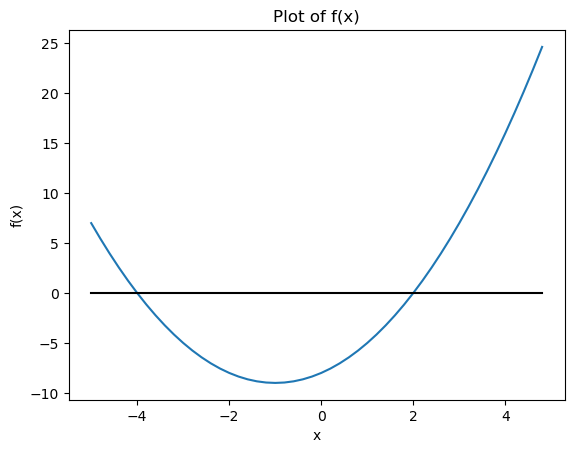

In [111]:
import matplotlib.pyplot as plt
import numpy as np
import math

a = 1
b = 2
c = -8
f = lambda x:a * x * x + b * x + c

x = np.arange(-5.0, 5.0, 0.2)

plt.title("Plot of f(x)")
plt.plot(x, f(x))
plt.plot(x, 0.0 * x,'k')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.savefig('3b.pdf')

plt.show()


The fuction below, *find_roots*, takes in a function, $f$, and two starting points, $x_1$ and $x_3$, and finds a root of $f$ between those two points 

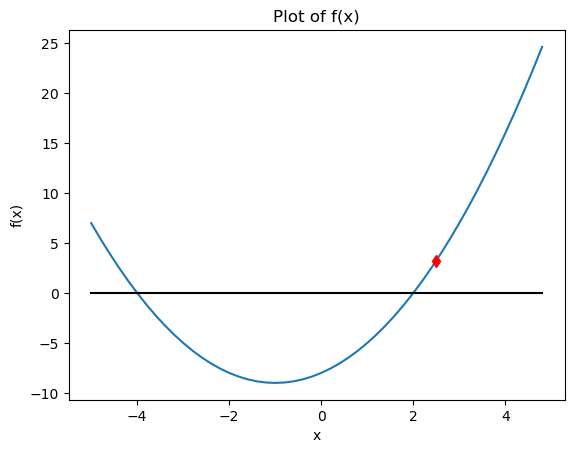

In [112]:
x1, x3 = 0,5
x2 = (x1+x3)/2

plt.title("Plot of f(x)")
plt.plot(x, f(x))
plt.plot(x, 0.0 * x,'k')
plt.plot(x2,f(x2),'rd')
plt.xlabel("x")
plt.ylabel("f(x)")

plt.savefig('3e.pdf')
plt.show()

In [113]:
def find_roots(f,x1,x3,tol=0.0001,test = False):

    x2 = (x1+x3)/2
    iter = 0

    #Check if f(x1) or f(x3) are 0
    if (f(x1) == 0):
        return x1
    elif (f(x3) == 0):
        return x3
    #Check if f(x1) & f(x3) are below-above 0
    if (f(x1)>0 or f(x3)<0):
        return np.nan
    
    while (math.fabs(f(x2)) > tol):

        x2 = (x1+x3)/2
        iter+=1

        if(f(x2) > 0):
            x3 = x2
        elif(f(x2) < 0):
            x1 = x2
        
        
    if test == True:  
        return iter
    else:
        return x2
    

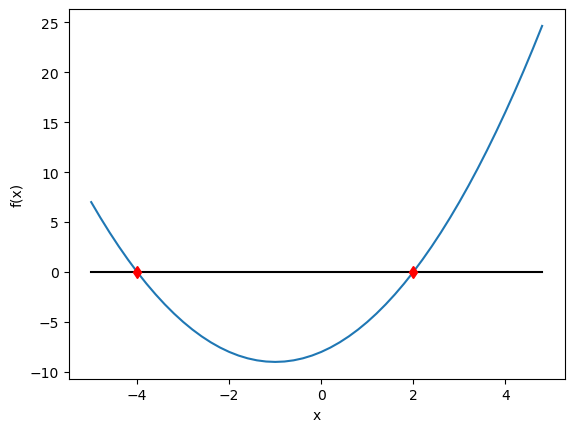

f(2.000008) = 0.000046
f(-4.000015) = 0.000092


In [114]:
Lroot = find_roots(f,0,5)
Rroot = find_roots(f,0,-5)


plt.plot(x, f(x))
plt.plot(x, 0.0 * x,'k')
plt.plot(Lroot, f(Lroot), "rd")
plt.plot(Rroot, f(Rroot), "rd")
plt.xlabel("x")
plt.ylabel("f(x)")

plt.savefig('3h.pdf')
plt.show()
print("f(%.6f) = %.6f" % (Lroot,f(Lroot)))
print("f(%.6f) = %.6f" % (Rroot,f(Rroot)))

To see how the tolerance of error in our answer affects runtime, iteriations can be plotted against the logarithim of tolerance. 

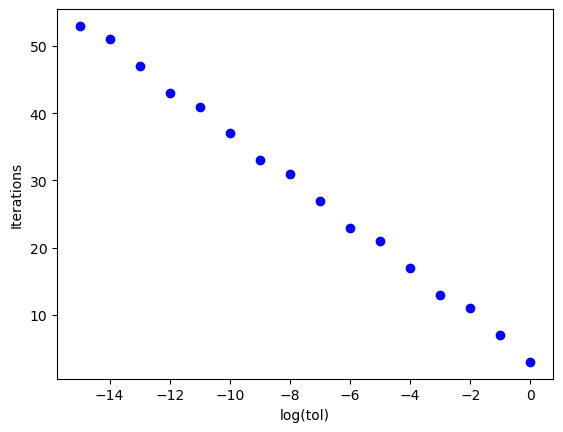

In [115]:
tol = np.logspace(-15,0,16)
iter = [find_roots(f,0,5,t,True) for t in tol]
plt.plot([math.log10(t) for t in tol],iter,"bo")
plt.xlabel("log(tol)")
plt.ylabel("Iterations")

plt.savefig('3j.pdf')
plt.show()

As seen, the iterations increases linearly as the logarithim of tolerance decreases. 

### Section 4 --- Newton-Raphson Method


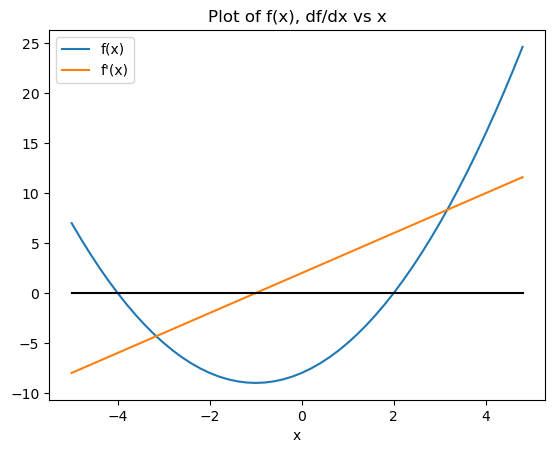

In [116]:
dfdx = lambda x: 2*a*x + b

plt.title("Plot of f(x), df/dx vs x")
plt.plot(x, f(x),label = "f(x)")
plt.plot(x, dfdx(x), label = "f'(x)")
plt.plot(x, 0.0 * x, "k")
plt.xlabel("x")
#lt.ylabel("f(x)")
plt.legend()
plt.show()

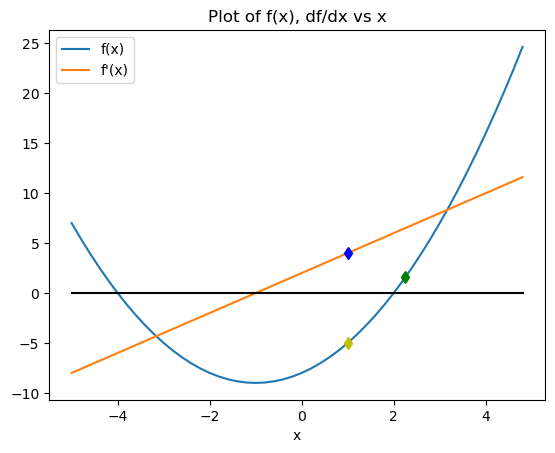

In [117]:
dfdx = lambda x: 2*a*x + b
x1 = 1
x2 = x1-f(x1)/dfdx(x1)

plt.title("Plot of f(x), df/dx vs x")
plt.plot(x, f(x),label = "f(x)")
plt.plot(x, dfdx(x), label = "f'(x)")
plt.plot(x, 0.0 * x, "k")

plt.plot(x1,f(x1),'yd')
plt.plot(x1,dfdx(x1),'bd')
plt.plot(x2,f(x2),'gd')

plt.xlabel("x")
plt.legend()

plt.savefig('4d.pdf')
plt.show()

In [118]:
def find_roots_NR(f,dfdx,x=1,tol=0.0001, test = False):

    iter = 0

    while math.fabs(f(x)) > tol:

        iter+=1
        if dfdx(x) == 0: return math.nan
        x = x-f(x)/dfdx(x)

    if test == False:
        return x
    else:
        return iter

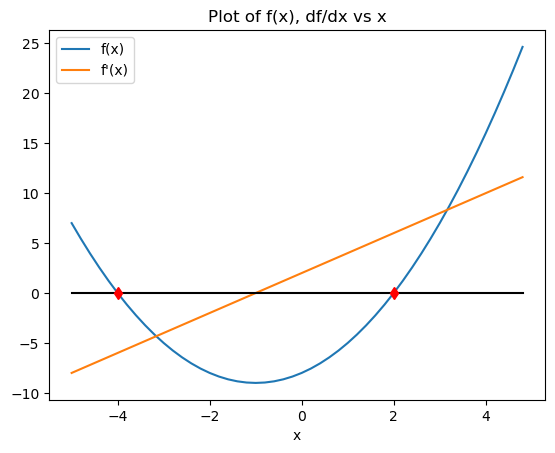

f(-4.000000) = 0.000000, f(2.000015) = 0.000092


In [119]:
dfdx = lambda x: 2*a*x + b

rootLeft = find_roots_NR(f,dfdx, -2)
rootRight = find_roots_NR(f,dfdx, 1)

plt.title("Plot of f(x), df/dx vs x")
plt.plot(x, f(x),label = "f(x)")
plt.plot(x, dfdx(x), label = "f'(x)")
plt.plot(x, 0.0 * x, "k")
plt.plot(rootLeft,f(rootLeft), "rd")
plt.plot(rootRight,f(rootRight), "rd")
plt.xlabel("x")
plt.legend()

plt.savefig('4g.pdf')
plt.show()

print("f(%f) = %f, f(%f) = %f" % (rootLeft, f(rootLeft), rootRight, f(rootRight)))




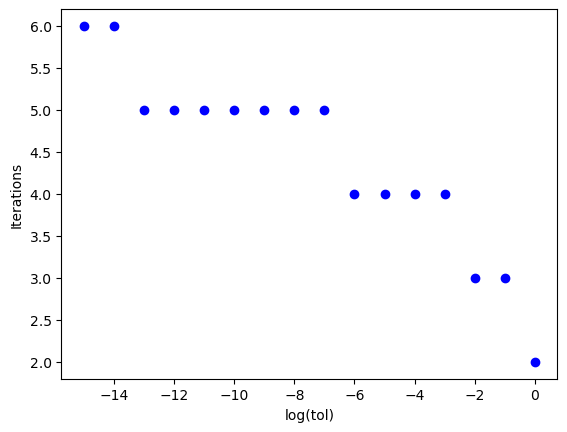

In [120]:
tol = np.logspace(-15,0,16)
iter = [find_roots_NR(f,dfdx,5,t,True) for t in tol]
plt.plot([math.log10(t) for t in tol],iter,"bo")
plt.xlabel("log(tol)")
plt.ylabel("Iterations")

plt.savefig('4i.pdf')
plt.show()

As seen above, the Newton-Raphson meathod iterations increases linearly as the logarithim of tolerance decreases, however it increases slower than the first, making the NR method more effiecient

### Section 5 --- Minima of Potenital Energy Function

The potenital energy between two ions, such as Na+ and Cl- is given by the function $U(x) = A\exp{(-x/p)}-\large\frac{e^2}{4\pi\epsilon_0}\frac{1}{x}$. The value of $\large\frac{e^2}{4\pi\epsilon_0}$, $A$, $p$ are given by $1.44 eVnm$, $1090 eV$ and $0.033 nm$ respectively. The first and second derivatives w.r.t $x$ are given by $U_x(x) = \frac{\mathrm{e}^{2}}{4\pi{\epsilon}_{0} x^{2}} - \frac{A\mathrm{e}^{-\frac{x}{p}}}{p}$ and $U_{x^2} = \frac{A\mathrm{e}^{-\frac{x}{p}}}{p^{2}} - \frac{\mathrm{e}^{2}}{2\pi{\epsilon}_{0} x^{3}}$

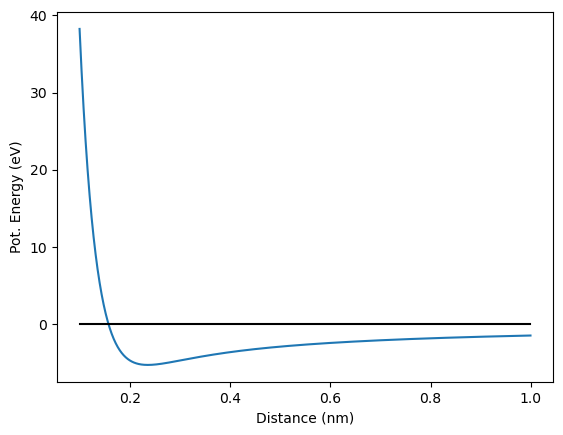

In [121]:
m = 1.44
A = 1090
p = 0.033


x = np.arange(0.1,1,0.001)
x2 = np.arange(0.2,1,0.001)
x3 = np.arange(0.305,1,0.001)

U = lambda x: A*np.exp(-x/p)-(m/x)
dUdx = lambda x: (m/x**2)-(A*np.exp(-x/p))/p
dUdxx = lambda x: (A*np.exp(-x/p))/(p**2)-m/(x**3)

plt.plot(x,U(x))
plt.plot(x,x*0,"k")
plt.xlabel("Distance (nm)")
plt.ylabel("Pot. Energy (eV)")

plt.savefig('5a.pdf')
plt.show()


As seen above, -$\large\frac{dU}{dx}$ is 0 when $U$ is at a minimum, since that is when there is no net force acting on the system, and thus no change in potential energy. To find the minimum of potential energy then, the NR method can be used to find the root of -$\large\frac{dU}{dx}$.


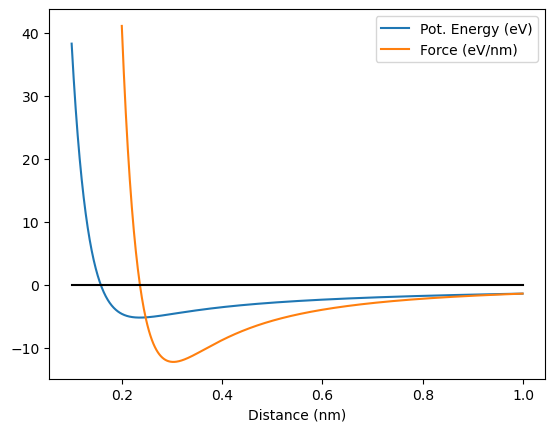

In [122]:
plt.plot(x,U(x),label = "Pot. Energy (eV)")
plt.plot(x2,-dUdx(x2), label = "Force (eV/nm)")
plt.plot(x,x*0,"k")
plt.xlabel("Distance (nm)")
plt.legend()

plt.savefig('5b.pdf')
plt.show()

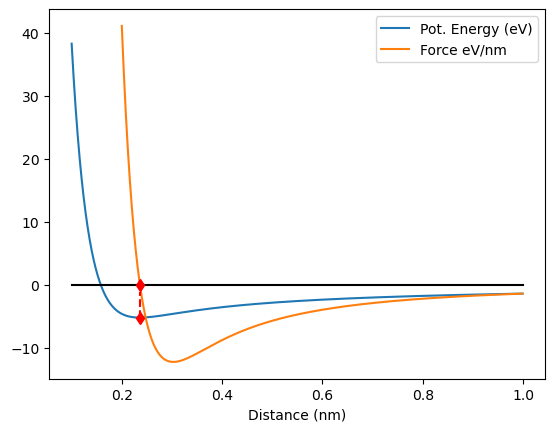

U(0.236054) = -5.247489


In [123]:
root = find_roots_NR(dUdx, dUdxx, x=0.2)

plt.plot(x,U(x),label = "Pot. Energy (eV)")
plt.plot(x2,-dUdx(x2), label = "Force eV/nm")
#plt.plot(x3, dUdxx(x3))
plt.plot(x,x*0,"k")

plt.plot(root, dUdx(root), 'rd')
plt.plot(root,U(root), 'rd')
plt.plot((root,root,root),np.arange(U(root),dUdx(root),2), 'r--')
plt.xlabel("Distance (nm)")
plt.legend()

plt.savefig('5d.pdf')
plt.show()

print("U(%f) = %f" % (root, U(root)))

